# **PERSONAL NOTE WEEK 01 - TEXT PREPROCESSING**
---
Mentor: Nguyễn Văn Phước

Mentee: Nguyễn Vân Phi Yến #22 - Team 06

Document: [NLTK - Processing Raw Text](https://www.nltk.org/book/ch03.html)

# **LIBRARIES**
---

In [ ]:
!pip install nltk

In [ ]:
import nltk, re, pprint
from nltk import word_tokenize

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# **What is NLTK?**
---
Natural Language Toolkit (NLTK) is a platform for building Python programs to work with human language data. It provides many resources, such as [NLTK Data](https://www.nltk.org/nltk_data/), along with s suite of text processing libraries for **classification, tokenization, stemming, tagging, parsing, and semantic reasioning**, wrappers for industrial-strength NLP libraries.

# **NLP PIPELINE**
---
An NLP pipeline is a sequence of steps that transforms raw text into structured data for analytics. Typically following as:
1. **Input**: Collect raw text (web, files, user input)
2. **Cleaning**: Remove markup, handle Unicode, normalize text
3. **Tokenization**: Split into sentences or words
4. **Normalization**: Lowercasing, stemming, lemmatization
5. **Feature Extraction:** Build vocabulary, count frequencies, find collocations
6. **Output**: Display, visualize, or save results for further analysis

# **1. INPUT RESOURCES**
---
You can access text data from many methods: electronc books, website, disk...
1.   Electronic Books
2.   Dealing with HTML
3.   Processing Search Engine Results
4.   Processing RSS Feeds
5.   Reading Local Files
6.   Extracting Text from PDF, MSWord and other Binary Formats




## **1.1. Electronic Books**

In [ ]:
from urllib import request

In [ ]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt" #Free online books resource

In [ ]:
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [ ]:
type(raw) # type of input data

str

In [ ]:
raw[:75] # first 75 characters of data

'*** START OF THE PROJECT GUTENBERG EBOOK 2554 ***\n\n\n\n\nCRIME AND PUNISHMENT\n'

In [ ]:
len(raw)

1135213

## **1.2. HTML**

In [ ]:
import requests

In [ ]:
# Vietnamese HTML
vie_url = "https://baochinhphu.vn/bo-chinh-tri-cho-y-kien-ve-cong-tac-chuan-bi-dai-hoi-dang-bo-tinh-an-giang-va-lam-dong-102250903195118462.htm"
response = requests.get(vie_url)
response.encoding = response.apparent_encoding # Detect apparent encoding
vie_html = response.text

In [ ]:
vie_html[:1000]

'\r\n<!DOCTYPE html>\r\n<html lang="vi">\r\n<head>\r\n    <!-- Robots -->\r\n    <meta name="googlebot" content="noarchive" />\r\n    <meta name="robots" content="index, follow" />\r\n\r\n    <title>Bộ Chính trị cho ý kiến về công tác chuẩn bị Đại hội Đảng bộ tỉnh An Giang và Lâm Đồng</title>\r\n    <meta name="description" content="(Chinhphu.vn) - Ngày 3/9, tại Trụ sở Trung ương Đảng, đại diện Bộ Chính trị đã làm việc với Ban Thường vụ Tỉnh uỷ An Giang và Ban Thường vụ Tỉnh uỷ Lâm Đồng để cho ý kiến vào dự thảo các văn kiện và phương án nhân sự trình Đại hội đại biểu Đảng bộ tỉnh nhiệm kỳ 2025 - 2030." />\r\n\t<meta name="keywords" content="Bộ Chính trị, trung ương đảng, Phạm Minh Chính, Tỉnh An Giang, tỉnh Lâm Đồng" />\r\n\t<meta name="news_keywords" content="Bộ Chính trị, trung ương đảng, Phạm Minh Chính, Tỉnh An Giang, tỉnh Lâm Đồng" />\r\n\t<meta property="og:title" content="Bộ Ch&#237;nh trị cho &#253; kiến về c&#244;ng t&#225;c chuẩn bị Đại hội Đảng bộ tỉnh An Giang v&#224; L&#2

In [ ]:
# English HTML
eng_url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
eng_html = request.urlopen(eng_url).read().decode('utf8')
eng_html[:1000]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">\r\n<html>\r\n<head>\r\n<title>BBC NEWS | Health | Blondes \'to die out in 200 years\'</title>\r\n<meta name="keywords" content="BBC, News, BBC News, news online, world, uk, international, foreign, british, online, service">\r\n<meta name="OriginalPublicationDate" content="2002/09/27 11:51:55">\r\n<meta name="UKFS_URL" content="/1/hi/health/2284783.stm">\r\n<meta name="IFS_URL" content="/2/hi/health/2284783.stm">\r\n<meta name="HTTP-EQUIV" content="text/html;charset=iso-8859-1">\r\n<meta name="Headline" content="Blondes \'to die out in 200 years\'">\r\n<meta name="Section" content="Health">\r\n<meta name="Description" content="Natural blondes are an endangered species and will die out by 2202, a study suggests.">\r\n<!-- GENMaps-->\r\n<map name="banner">\r\n<area alt="BBC NEWS" coords="7,9,167,32" href="http://news.bbc.co.uk/1/hi.html" shape="RECT">\r\n</map>\r\n\r\n<script src="/

In [ ]:
print(eng_html)

<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
<html>
<head>
<title>BBC NEWS | Health | Blondes 'to die out in 200 years'</title>
<meta name="keywords" content="BBC, News, BBC News, news online, world, uk, international, foreign, british, online, service">
<meta name="OriginalPublicationDate" content="2002/09/27 11:51:55">
<meta name="UKFS_URL" content="/1/hi/health/2284783.stm">
<meta name="IFS_URL" content="/2/hi/health/2284783.stm">
<meta name="HTTP-EQUIV" content="text/html;charset=iso-8859-1">
<meta name="Headline" content="Blondes 'to die out in 200 years'">
<meta name="Section" content="Health">
<meta name="Description" content="Natural blondes are an endangered species and will die out by 2202, a study suggests.">
<!-- GENMaps-->
<map name="banner">
<area alt="BBC NEWS" coords="7,9,167,32" href="http://news.bbc.co.uk/1/hi.html" shape="RECT">
</map>

<script src="/nol/shared/js/livestats_v1_1.js" language="JavaScript" t



> **!!! NOTE:** If we only use request.urlopen to fetch HTML, the raw result will include the full HTML content with meta tags, image maps, JavaScript, forms, and tables.

> In this case, to get text out of HTML, we will use a Python library called ***BeautifulSoup***



### **BeautifulSoup**
---

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
raw = BeautifulSoup(eng_html, 'html.parser').get_text()
tokens = word_tokenize(raw)
tokens

['BBC',
 'NEWS',
 '|',
 'Health',
 '|',
 'Blondes',
 "'to",
 'die',
 'out',
 'in',
 '200',
 'years',
 "'",
 'NEWS',
 'SPORT',
 'WEATHER',
 'WORLD',
 'SERVICE',
 'A-Z',
 'INDEX',
 'SEARCH',
 'You',
 'are',
 'in',
 ':',
 'Health',
 'News',
 'Front',
 'Page',
 'Africa',
 'Americas',
 'Asia-Pacific',
 'Europe',
 'Middle',
 'East',
 'South',
 'Asia',
 'UK',
 'Business',
 'Entertainment',
 'Science/Nature',
 'Technology',
 'Health',
 'Medical',
 'notes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Talking',
 'Point',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Country',
 'Profiles',
 'In',
 'Depth',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Programmes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'SERVICES',
 'Daily',
 'E-mail',
 'News',
 'Ticker',
 'Mobile/PDAs',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Text',
 'Only',
 'Feedback',
 'Help',
 'EDITIONS',
 'Change',
 'to',
 'UK',
 'Friday',
 ',',
 '27',
 'September',
 ',',
 '2002',
 ',',
 '11:51',
 'GMT',
 '1

In [ ]:
tokens = tokens[110:390]
text = nltk.Text(tokens)
text.concordance('gene')

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


## **1.3. Processing RSS Feeds**
---
To collect text data from blogs, we can use the Python library **Universal Feed Parser** (feedparser) to access and parse RSS/Atom feeds.

> [Universal Feed Parser](https://pypi.python.org/pypi/feedparser)

In [ ]:
pip install feedparser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.7 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=8a018cc6411aced1686ff30725ef4a15e05f37ca91b2a31b00cf98a4f5b7e3b9
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k


In [ ]:
import feedparser

In [ ]:
llog = feedparser.parse("https://languagelog.ldc.upenn.edu/nll/?feed=atom")
llog.feed.title

'Language Log'

In [ ]:
len(llog.entries)

13

In [ ]:
post = llog.entries[2]
post.title

'&quot;The ball will be in their &#8230; corner&quot;?'

## **1.4. Reading Local Files**
---



### **.TXT FILES**
---
> **.txt**: Use Python's built-in ***open( )*** function, followed by the ***read( )*** method
```
txt_files = open('document.txt')
txt_raw = txt_files.read()
```

In [ ]:
folder_path = '/content/drive/MyDrive/SudoCode 2025/Personal Note/Data/'

In [ ]:
txt_files = open(folder_path+'document.txt')
txt_raw = txt_files.read()

In [ ]:
txt_raw

'Full IELTS Listening Test TranscriptThis recording is copyright.IELTS-Blog.com listening practice test. In the IELTS test you hear some recordings\nand you have to answer questions on them. You have time to read the instructions\nand questions and check your work. All recordings are played only once. The test is\nin four sections. Now turn to section one.Section one. You will hear a conversation between a man and a woman as the\nwoman organises the rental of a car.First you have some time to look at questions one to five.(20 second gap)Now the full test will begin. You should answer the questions as you listen, as the\nrecording is not played twice. Listen carefully to the conversation and answer\nquestions one to five.'

### **.PDF FILES**
---
To extract text from a PDF file, we need to use the **pypdf** library.


```
from pypdf import PdfReader
files = PdfReader('files.pdf')
```

In [ ]:
pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 8.1 MB/s eta 0:00:00


In [ ]:
# importing required modules
from pypdf import PdfReader

In [ ]:
pdf_file = PdfReader(folder_path+'Comparison_of_Deep_Learning_Algorithms_t.pdf')

In [ ]:
# printing number of pages in pdf file
print(len(pdf_file.pages))

5


In [ ]:
# getting a specific page from the pdf file
first_page = pdf_file.pages[0]

In [ ]:
# extracting text from page
text = first_page.extract_text()
print(text)

  
 
Abstract—A top priority in any business is a constant need to 
increase revenue and proﬁtability. One  of the causes for a 
decrease in proﬁts is when current customers stop transacting. 
When a customer leaves or churns from a business, the 
opportunity for potential sales or cross selling is lost. If a 
customer leaves the business without any form of advice, the 
company may ﬁnd it hard to respond and take corrective action. 
Ideally companies should adopt a proactive and identify 
potential churners prior to them leaving. Customer retention 
strategies have been noted to be less costly than attracting new 
customers. Through data available within the Point of Sales 
(POS) systems, customer transactions may be extracted and 
their buying patterns may be analysed. This paper demonstrates 
how through transactional data features are created and may be 
identiﬁed as signiﬁcant to predict churn within the retail 
industry. The data provided within this paper pertains to a local 
s

### **WORD FILES**
---
To extract text from a Word file (specifically, a .docx file) using Python, the **python-docx library** is the most commonly used and recommended tool.


```
from docx import Document
document = Document(docx_path)
```



In [ ]:
pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
from docx import Document

In [ ]:
docx_file = Document(folder_path+'Chapter 5.docx')
print(len(docx_file.paragraphs))

295


In [ ]:
# Extract text from each paragraph
extracted_text = []
for paragraph in docx_file.paragraphs:
    extracted_text.append(paragraph.text)

# Join the extracted text into a single string
full_text = '\n'.join(extracted_text)
print(full_text)










Chapter 5:                                                                                    Regression Method
Kỹ thuật phân tích hồi quy

LỜI NÓI ĐẦU CHƯƠNG
Trong chương này, một trong những kỹ thuật thường được sử dụng trong khoa học dữ liệu- khớp dữ liệu với các hàm, hay còn gọi là hàm khớp (FUNCTION FITTING) sẽ được khám phá. Ý tưởng cơ bản của hàm khớp là dự đoán giá trị (hoặc phân loại) của thuộc tính phụ thuộc y, bằng cách kết hợp các thuộc tính dự đoán x thành một hàm y=f(X). Kỹ thuật khớp hàm bao gồm nhiều phương pháp khác nhau, trong đó phổ biến nhất là hồi quy tuyến tính (REGRESSION) để dự đoán giá trị số và hồi quy logistic để phân loại. Hai phương pháp này chiếm phần lớn nội dung của chương này.
Các mô hình hồi quy vẫn là một trong những công cụ phân tích phổ biến nhất được các chuyên gia sử dụng ngày nay. Hồi quy là một kỹ thuật tương đối lâu đời, bắt nguồn từ thời kỳ Victoria (những năm 1830 đến đầu những năm 1900). Nhiều công trình tiên phong trong lĩnh vực nà

# **2. STRINGS**
---


In [ ]:
s = "This is my personal note for Week 1 Sudo Code 2025"
t = "Su"
u = "Do"

In [ ]:
# s.find(t): first instance
print(f"s.find('{t}'):", s.find(t))

# s.rfind(t): last instance
print(f"s.rfind('{t}'):", s.rfind(t))

# s.index(t)
print(f"s.index('{t}'):", s.index(t))

s.find('Su'): 36
s.rfind('Su'): 36
s.index('Su'): 36


In [ ]:
# s.join(text)
text_list = ["Combining", "these", "words"]
print(f"'-'.join({text_list}):", '-'.join(text_list))

'-'.join(['Combining', 'these', 'words']): Combining-these-words


In [ ]:
# s.split(t)
print(f"s.split(' '):", s.split(' '))

# s.splitlines()
multi_line_string = "Line 1\nLine 2\nLine 3"
print(f"'{multi_line_string}'.splitlines():", multi_line_string.splitlines())

s.split(' '): ['This', 'is', 'my', 'personal', 'note', 'for', 'Week', '1', 'Sudo', 'Code', '2025']
'Line 1
Line 2
Line 3'.splitlines(): ['Line 1', 'Line 2', 'Line 3']


In [ ]:
# s.lower()
print(f"s.lower():", s.lower())

# s.upper()
print(f"s.upper():", s.upper().upper())

# s.title()
print(f"s.title():", s.title())

s.lower(): this is my personal note for week 1 sudo code 2025
s.upper(): THIS IS MY PERSONAL NOTE FOR WEEK 1 SUDO CODE 2025
s.title(): This Is My Personal Note For Week 1 Sudo Code 2025


In [ ]:
# s.strip()
whitespace_string = "   String with whitespace   "
print(f"'{whitespace_string}'.strip():", whitespace_string.strip())

'   String with whitespace   '.strip(): String with whitespace


In [ ]:
# s.replace(t, u)
print(f"s.replace('{t}', '{u}'):", s.replace(t, u))

s.replace('Su', 'Do'): This is my personal note for Week 1 Dodo Code 2025


# **3. UNICODE**
---
**Unicode** is a universal character encoding standard that assigns every character (letters, digits, symbols, emojis, etc.) a unique number called a code point (for example, U+0041 for the letter A).

> **Decode:** convert bytes from a file/stream into Unicode characters.

> **Encode:** convert Unicode characters into bytes for storage or display.


In [ ]:
# Unicode character -> code point
ord('â')

226

In [ ]:
# code point -> Unicode character
chr(226)

'â'

**A GLYPH** is the visual representation of a character.

* A character is an abstract symbol defined by Unicode (for example, the character A with code point U+0041).

* A glyph is how that character actually looks when rendered on screen or printed, depending on the font.

In [ ]:
nacute = '\u0144'
nacute

'ń'

In [ ]:
# print as byte
nacute.encode('utf8')
#'ń' trong UTF-8 được lưu bằng 2 byte: C5 84 (hex).

b'\xc5\x84'

# **4. REGULAR EXPRESSIONS** - *Detecting Word Patterns*
---


In [ ]:
# To use regular expression
import re

In [ ]:
# Using word corpus from NLTK
nltk.download('words')
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


> **$** : matches the end of word

In [ ]:
[w for w in wordlist if re.search('ed$', w)]

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded',
 'absorbed',
 'abstracted',
 'abstricted',
 'accelerated',
 'accepted',
 'accidented',
 'accoladed',
 'accolated',
 'accomplished',
 'accosted',
 'accredited',
 'accursed',
 'accused',
 'accustomed',
 'acetated',
 'acheweed',
 'aciculated',
 'aciliated',
 'acknowledged',
 'acorned',
 'acquainted',
 'acquired',
 'acquisited',
 'acred',
 'aculeated',
 'addebted',
 'added',
 'addicted',
 'addlebrained',
 'addleheaded',
 'addlepated',
 'addorsed',
 'adempted',
 'adfected',
 'adjoined',
 'admired',
 'admitted',
 'adnexed',
 'adopted',
 'adossed',
 'adreamed',
 'adscripted',
 'aduncated',
 'advanced',
 'advised',
 'aeried',
 'aethered',
 'afeared',
 'affected',
 'affectioned',
 'affined',
 'afflicted',
 'affricated',
 'affrighted',
 'affronted',
 'aforenamed',
 'afterfeed',
 'aftershafted',
 'afterthoughted',
 'afterwitted',
 'agazed',
 'aged',
 'agglomerated',
 'aggri

> **^** : matches the start of a string

In [ ]:
# ^: match the start of a string
[w for w in wordlist if re.search('^j..ed$', w)]

['jaded', 'jawed']

**Basic Regular Expression**
---
* **"\b"** (chuỗi thường) → Python hiểu là backspace.

* **r"\b"** (raw string) → Python giữ nguyên \b để regex hiểu là word boundary.

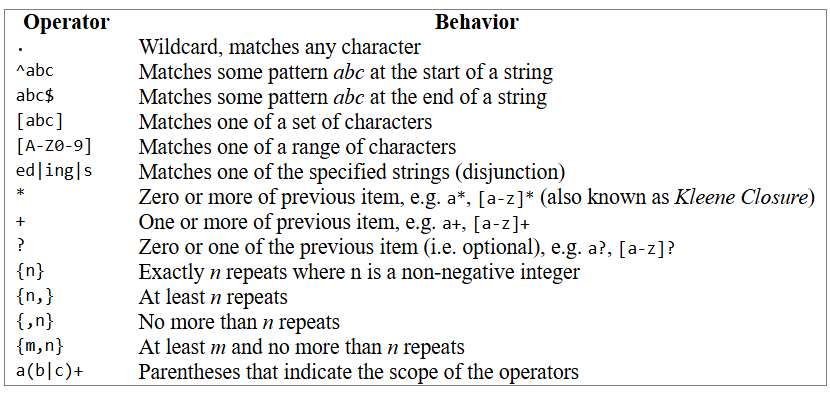

## **Extracting Word Pieces**
---


```
re.findall()
```
Method *find-all* (non-overlapping) matches of the given regular expressions


In [ ]:
word = 'nguyenvanphiyenmentee22fromsudocode2025hehehe'

In [ ]:
re.findall(r'[ueoai]', word)

['u',
 'e',
 'a',
 'i',
 'e',
 'e',
 'e',
 'e',
 'o',
 'u',
 'o',
 'o',
 'e',
 'e',
 'e',
 'e']

In [ ]:
# number of 'r' in the string
re.findall(r'r', word)
len(re.findall(r'r', word))

1

## **Searching Tokenized Text**
---
NLTK extends regular expressions with the **<...>** syntax to match tokens instead of characters, making it easier to search for patterns in tokenized text (such as phrases or word sequences).


```
<.*> biểu diễn một token cụ thể (ví dụ <a> khớp token "a")
```
```
<.*> khớp bất kỳ một token nào (dấu . trong regex là ký tự bất kỳ, * = nhiều, nhưng ở đây NLTK quy ước để đại diện cho “một token bất kỳ”).
```


```
Dấu cách giữa <...> sẽ bị bỏ qua
```






In [ ]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [ ]:
from nltk.corpus import gutenberg, nps_chat

In [ ]:
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))

In [ ]:
moby.findall(r"<a> (<.*>) <man>")

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


# **5. NORMALIZING TEXT**
---
*   Stemmers
*   Lemmatization



In [ ]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
... is no basis for a system of government.  Supreme executive power derives from
... a mandate from the masses, not from some farcical aquatic ceremony."""

In [ ]:
tokens = word_tokenize(raw)

In [ ]:
tokens

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'women',
 'lying',
 'in',
 'ponds',
 'distributing',
 'swords',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'masses',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

## **STEMMERS**
---
> **Stemming** = the process of reducing a word to its base/root form (called a stem)

For example:
*   lying → lie (Porter Stemmer)
*   lying → lying (Lancaster Stemmer, less accurate in this case)




In [ ]:
porter = nltk.PorterStemmer()   # Porter Stemmer
[porter.stem(t) for t in tokens]

['denni',
 ':',
 'listen',
 ',',
 'strang',
 'women',
 'lie',
 'in',
 'pond',
 'distribut',
 'sword',
 'is',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'suprem',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandat',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcic',
 'aquat',
 'ceremoni',
 '.']

In [ ]:
lancaster = nltk.LancasterStemmer()   # Lancaster
[lancaster.stem(t) for t in tokens]

['den',
 ':',
 'list',
 ',',
 'strange',
 'wom',
 'lying',
 'in',
 'pond',
 'distribut',
 'sword',
 'is',
 'no',
 'bas',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'suprem',
 'execut',
 'pow',
 'der',
 'from',
 'a',
 'mand',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'som',
 'farc',
 'aqu',
 'ceremony',
 '.']

> Stemming is not a well-defined process ▶ Pick the stemmer that **best suits the application we have in mind**

▶ **Porter** - Best choice for indexing some texts and want to support search using alternative forms of words

In [ ]:

class IndexedText(object):

    def __init__(self, stemmer, text):
        self._text = text
        self._stemmer = stemmer
        self._index = nltk.Index((self._stem(word), i)
                                 for (i, word) in enumerate(text))

    def concordance(self, word, width=40):
        key = self._stem(word)
        wc = int(width/4)                # words of context
        for i in self._index[key]:
            lcontext = ' '.join(self._text[i-wc:i])
            rcontext = ' '.join(self._text[i:i+wc])
            ldisplay = '{:>{width}}'.format(lcontext[-width:], width=width)
            rdisplay = '{:{width}}'.format(rcontext[:width], width=width)
            print(ldisplay, rdisplay)

    def _stem(self, word):
        return self._stemmer.stem(word).lower()

In [ ]:
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


True

In [ ]:
porter = nltk.PorterStemmer()
grail = nltk.corpus.webtext.words('grail.txt')

text = IndexedText(porter, grail)
text.concordance('lie')

r king ! DENNIS : Listen , strange women lying in ponds distributing swords is no
 beat a very brave retreat . ROBIN : All lies ! MINSTREL : [ singing ] Bravest of
       Nay . Nay . Come . Come . You may lie here . Oh , but you are wounded !   
doctors immediately ! No , no , please ! Lie down . [ clap clap ] PIGLET : Well  
ere is much danger , for beyond the cave lies the Gorge of Eternal Peril , which 
   you . Oh ... TIM : To the north there lies a cave -- the cave of Caerbannog --
h it and lived ! Bones of full fifty men lie strewn about its lair . So , brave k
not stop our fight ' til each one of you lies dead , and the Holy Grail returns t


## **LEMMATIZATION**
---
* A stemmer just chops off prefixes/suffixes according to rules.
* A lemmatizer (like WordNetLemmatizer) checks against a dictionary (WordNet) to ensure the result is a valid word.
* Because of this extra lookup, lemmatization is slower than stemming but more accurate linguistically.


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'woman',
 'lying',
 'in',
 'pond',
 'distributing',
 'sword',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

## **REGEX FOR TOKENIZING TEXT**
---
> Tokenization is the process of splitting a string of text into tokens (the smallest identifiable linguistic units), usually words, punctuation marks, or symbols.

*For example:* "Hello, world!" → ["Hello", ",", "world", "!"]

In [ ]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
... though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
... well without--Maybe it's always pepper that makes people hot-tempered,'..."""

### **Splitting on whitespace**
Basic way:
```
raw.split()
```

> But this fails when text contains newlines (\n) or tabs (\t).

In [ ]:
re.split(r' ', raw)        # splits only on single spaces → leaves \n inside tokens

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone\nthough),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very\nwell',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

In [ ]:
re.split(r'[ \t\n]+', raw) # splits on any whitespace (spaces, tabs, newlines)

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very',
 'well',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

In [ ]:
re.split(r'\s+', raw)      # uses \s to mean “any whitespace”

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very',
 'well',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

### **Splitting on non-word characters**

* Python regex has \w = word characters ([a-zA-Z0-9_]), and \W = everything else.


```
re.split(r'\W+', raw) splits text on anything that is not a word.
```

> This removes punctuation but sometimes leaves empty strings (from boundaries).

> A cleaner version is re.findall(r'\w+', raw) which directly matches words instead of splitting.

In [ ]:
re.split(r'\W+', raw)

['',
 'When',
 'I',
 'M',
 'a',
 'Duchess',
 'she',
 'said',
 'to',
 'herself',
 'not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 'I',
 'won',
 't',
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 'Maybe',
 'it',
 's',
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot',
 'tempered',
 '']

In [ ]:
re.findall(r'\w+|\S\w*', raw)
# \w+ matches normal words.
# \S\w* matches punctuation plus following word characters (like 's)

["'When",
 'I',
 "'M",
 'a',
 'Duchess',
 ',',
 "'",
 'she',
 'said',
 'to',
 'herself',
 ',',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 ')',
 ',',
 "'I",
 'won',
 "'t",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 '.',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 '-',
 '-Maybe',
 'it',
 "'s",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot',
 '-tempered',
 ',',
 "'",
 '.',
 '.',
 '.']

In [ ]:
# \w+(?:[-']\w+)* handles internal hyphens/apostrophes (like hot-tempered or it's)
# [-.(]+ ensures sequences like --, ..., and ( are separate tokens
re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw)

["'",
 'When',
 "I'M",
 'a',
 'Duchess',
 ',',
 "'",
 'she',
 'said',
 'to',
 'herself',
 ',',
 '(',
 'not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 ')',
 ',',
 "'",
 'I',
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 '.',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 '--',
 'Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot-tempered',
 ',',
 "'",
 '...']

# **Regular Expression Symbols**
---
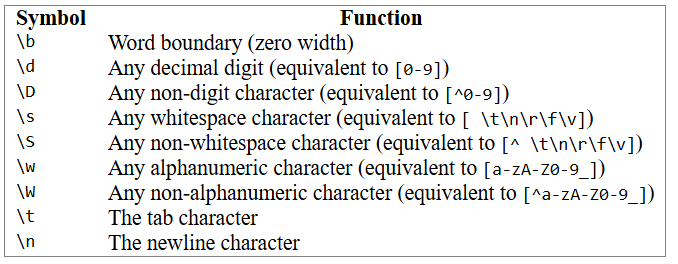

### **NLTK's Regular Expression Tokenizer**
---
```
nltk.regexp_tokenize()
```
NLTK’s **regexp_tokenize()** makes regex-based tokenization easier and cleaner.



In [ ]:
text = 'That U.S.A. poster-print costs $12.40...'

In [ ]:
 pattern = r'''(?x)     # set flag to allow verbose regexps
     (?:[A-Z]\.)+       # abbreviations, e.g. U.S.A.
   | \w+(?:-\w+)*       # words with optional internal hyphens
   | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
   | \.\.\.             # ellipsis
   | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
'''

In [ ]:
nltk.regexp_tokenize(text, pattern)

['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']

# **SEGMENTATION**
---
* Segmentation = bài toán chia văn bản liên tục thành các đơn vị ngôn ngữ (câu, từ)

* Tokenization: a special case of segmentation

## **Sentence Segmentation**
---
> Punkt Sentence Segmenter

In [ ]:
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')

In [ ]:
sents = nltk.sent_tokenize(text)
pprint.pprint(sents[79:89])

['"Nonsense!"',
 'said Gregory, who was very rational when anyone else\nattempted paradox.',
 '"Why do all the clerks and navvies in the\n'
 'railway trains look so sad and tired, so very sad and tired?',
 'I will\ntell you.',
 'It is because they know that the train is going right.',
 'It\n'
 'is because they know that whatever place they have taken a ticket\n'
 'for that place they will reach.',
 'It is because after they have\n'
 'passed Sloane Square they know that the next station must be\n'
 'Victoria, and nothing but Victoria.',
 'Oh, their wild rapture!',
 'oh,\n'
 'their eyes like stars and their souls again in Eden, if the next\n'
 'station were unaccountably Baker Street!"',
 '"It is you who are unpoetical," replied the poet Syme.']


## **Word Segmentation**
---
Khó cho ngôn ngữ không có dấu cách (Chinese, spoken text)

In [ ]:
# Văn bản không dấu cách
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"

In [ ]:
# Segmentation bằng chuỗi 0/1 (1 = có ngắt từ)
seg1 = "0000000000000001000000000010000000000000000100000000000"  # thô
seg2 = "0100100100100001001001000010100100010010000100010010000"  # chi tiết hơn

In [ ]:
def segment(text, segs):
    words, last = [], 0
    for i in range(len(segs)):
        if segs[i] == '1':
            words.append(text[last:i+1])
            last = i+1
    words.append(text[last:])
    return words

In [ ]:
print(segment(text, seg1))

['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']


In [ ]:
print(segment(text, seg2))

['do', 'you', 'see', 'the', 'kitty', 'see', 'the', 'doggy', 'do', 'you', 'like', 'the', 'kitty', 'like', 'the', 'doggy']


## **Segmentation Evaluation**
---
* Objective function: càng nhỏ càng tốt.
* Tính tổng = số từ + kích thước từ điển.

In [ ]:
def evaluate(text, segs):
    words = segment(text, segs)
    text_size = len(words)
    lexicon_size = sum(len(word) + 1 for word in set(words))
    return text_size + lexicon_size

In [ ]:
print(evaluate(text, seg1))
print(evaluate(text, seg2))

64
48


## **Best Optimized Segmentation**
---
> Using Simulated Annealing

In [ ]:
from random import randint

In [ ]:
def flip(segs, pos):
    return segs[:pos] + str(1-int(segs[pos])) + segs[pos+1:]

def flip_n(segs, n):
    for i in range(n):
        segs = flip(segs, randint(0, len(segs)-1))
    return segs

def anneal(text, segs, iterations, cooling_rate):
    temperature = float(len(segs))
    while temperature > 0.5:
        best_segs, best = segs, evaluate(text, segs)
        for i in range(iterations):
            guess = flip_n(segs, round(temperature))
            score = evaluate(text, guess)
            if score < best:
                best, best_segs = score, guess
        score, segs = best, best_segs
        temperature /= cooling_rate
        print(score, segment(text, segs))
    return segs


In [ ]:
anneal(text, seg1, 5000, 1.2)

64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
62 ['doy', 'ouseethe', 'kitty', 'see', 'thed', 'oggy', 'doy', 'ouliket', 'he', 'kitty', 'like', 'thed', 'oggy']
62 ['doy', 'ouseethe', 'kitty', 'see', 'thed', 'oggy', 'doy', 'ouliket', 'he', 'kitty', 'like', 'thed', 'oggy']
62 ['doy', 'ouseethe', 'kitty', 'see', 'thed', 'oggy', 'doy', 'ouliket', 'he', 'kitty', 'like', 'thed', 'oggy']
62 ['doy', 'ouseethe', 'kitty', 'see', 'thed', 'oggy', 'doy', 'ouliket', 'he', 'kitty', 'like', 'thed', 'oggy']
61 ['doy', 'ouseet',

'0000100100000001001000000010000100010000000100010000000'